# PROJECT FIFA 21
In the project we will be looking at the factors influencing the overall rating of players in the popular Sports videogame FIFA 21.
The question we would like to answer is:

What factors contribute to a player´s rating? 

What data will we look at?
The data for this project is an extracted from https://sofifa.com/

Explanations of the acronyms and abbreviations can be found at the links below.
1) https://gaming.stackexchange.com/questions/167318/what-do-fifa-14-position-acronyms-mean 
2) https://fifauteam.com/fifa-ultimate-team-positions-and-tactics/ 

In [2]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [3]:
# Ensure all pd cells are viewable.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None) 

In [4]:
# Handle warning messages


# Get Data
Read the data into an operable dataframe.

In [8]:
# Read data into a pandas dataframe
fifa_players = pd.read_csv('fifa21_training.csv')

# Preview the data
fifa_players.head()


,Unnamed: 0,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,1954,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,Right,1,"Jul 1, 2015",NaN,€525K,€4K,€801K,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,2225,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,Right,0,"Jan 16, 2015","Dec 31, 2020",€8.5M,€23K,€0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,1959,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,Right,0,"Jan 31, 2019",NaN,€9M,€49K,€15.3M,2019 ~ 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4 ★,4★,High,Medium,2 ★,80,77,78,86,27,56,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,74+2,74+2,74+2,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,9815,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,Right,13,"Jul 1, 2016",NaN,€275K,€4K,€694K,2016 ~ 2021,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2 ★,2★,Medium,Medium,1 ★,57,44,54,57,57,60,7,50+2,50+2,50+2,51+0,51+0,51+0,51+0,51+0,53+2,53+2,53+2,53+2,56+2,56+2,56+2,53+2,56+2,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,10074,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,Right,8,"Jul 1, 2018",NaN,€725K,€2K,€1.4M,2018 ~ 2021,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2 ★,3★,Low,Medium,1 ★,66,44,60,64,60,66,4,56+2,56+2,56+2,59+0,59+0,59+0,59+0,59+0,61+2,61+2,61+2,62+2,63+2,63+2,63+2,62+2,64+2,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65


In [9]:
# view data types
fifa_players.dtypes

Unnamed: 0            int64
ID                    int64
Name                 object
Age                   int64
Nationality          object
Club                 object
BP                   object
Position             object
Team & Contract      object
Height               object
Weight               object
foot                 object
Growth                int64
Joined               object
Loan Date End        object
Value                object
Wage                 object
Release Clause       object
Contract             object
Attacking             int64
Crossing              int64
Finishing             int64
Heading Accuracy      int64
Short Passing         int64
Volleys             float64
Skill                 int64
Dribbling             int64
Curve               float64
FK Accuracy           int64
Long Passing          int64
Ball Control          int64
Movement              int64
Acceleration          int64
Sprint Speed          int64
Agility             float64
Reactions           

In [10]:
# Define function to check NaN values.

def NaN_percenter(dataframe):
    null_df = pd.DataFrame(round(dataframe.isnull().sum()/len(dataframe),4)*100)
    null_df = null_df.reset_index()
    null_df.columns = ['feature','PercentNaNs']
    return null_df

NaNs = NaN_percenter(fifa_players)
NaNs.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101
feature,Unnamed: 0,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
PercentNaNs,0.0,0.0,0.0,0.0,0.0,0.15,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.32,94.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.0,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.0,0.32,0.0,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.05,0.05,0.32,0.0,2.4,0.0,0.0,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49,0.49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Clean / Prepare Data for Analysis
1. Drop columns 'Team & Contract','Joined','Loan Date End' as they do not likely contribute to our target meaningfully
2. Convert 'Joined' to datetime
3. Drop 'lbs' from weights
4. Standardize heights to cm
5. Replace NaN values with measures of central tendency

In [11]:
# Drop columns 'Unnamed: 0','Team & Contract','Loan Date End' 'Contract'
print(f'Data before dropping columns: {fifa_players.shape}')
fifa_players = fifa_players.drop(['Unnamed: 0','Team & Contract','Loan Date End', 'Contract'], axis = 1)
print(f'Data after dropping columns: {fifa_players.shape}')


Data before dropping columns: (13700, 102)
Data after dropping columns: (13700, 98)


In [13]:
# convert 'Joined' to datetime
fifa_players['Joined'] = pd.to_datetime(fifa_players['Joined'])
fifa_players['Joined'].head()

0   2015-07-01
1   2015-01-16
2   2019-01-31
3   2016-07-01
4   2018-07-01
Name: Joined, dtype: datetime64[ns]

In [14]:
# Standardize 'Height' to cm
def height_cm_converter(height):
    if "'" in height:
        feet = height.split("'")[0][0]
        inches = height.split("'")[1][:-1]
        total_inches = float(feet)*12 + float(inches)
        to_cm = total_inches *2.54
        return to_cm
    else: 
        pass
    

fph = fifa_players['Height']
fifa_players['Height'] = fph.apply(height_cm_converter)
fifa_players['Height'].head()

0    175.26
1    182.88
2    162.56
3    177.80
4    180.34
Name: Height, dtype: float64

In [15]:
# define function to clean non numerical elements from the start or end of a string

def drop_string(column, string = '', place = 'start'):
    clean_values = []
    for value in column:
        if string in value and place == 'start':
            string_len = len(string)
            value = value[(string_len):]
            clean_values.append(value)
        elif string in value and place == 'end':
            string_len = len(string)
            value = value[:-(string_len)]
            clean_values.append(value)
        else:
            pass
    if len(clean_values) == column.shape[0]:
        return clean_values
    else:
        pass

# convert weight to numerical values
fifa_players['Weight'] = drop_string(fifa_players['Weight'], 'lbs', 'end')
fifa_players['Weight'] = fifa_players['Weight'].apply(int)


In [16]:
# convert columns 'Value', 'Wage', 'Release Clause' to numeric
for column in ['Value', 'Wage', 'Release Clause']:
    fifa_players[column] = drop_string(fifa_players[column],'€','start')


def K_M_to_num(value):
    if 'K' in  str(value.upper()):
        value = value[:-1]
        value = float(value)*10**3
        return value
    elif 'M' in str(value.upper()):
        value = value[:-1]
        value = float(value)*10**6
        return value

# convert numbers to numerical values
for column in ['Value', 'Wage', 'Release Clause']:
    fifa_players[column] = fifa_players[column].apply(K_M_to_num)


In [17]:
# remove special character '★' from columns 'W/F', 'SM', 'IR',
for column in ['W/F', 'SM', 'IR']:
    fifa_players[column] = drop_string(fifa_players[column],'★','end')
    fifa_players[column] = fifa_players[column].apply(int)

In [18]:
#convert 'Hits' to int64
fifa_players['Hits'] = fifa_players['Hits'].apply(K_M_to_num)

In [19]:
# define function to replace NaNs with mean values for columns with NaNs within defined limit
def NaN_replacer(dataframe):
    nulls_dataframe = NaN_percenter(dataframe)
    to_replace = []
    indexp = 0
    for p in nulls_dataframe['PercentNaNs']:
        if p > 0:
            to_replace.append(nulls_dataframe['feature'][indexp])
        indexp +=1
        for column in to_replace:
            if dataframe[column].dtype == 'int64' or  dataframe[column].dtype == 'float64' :
                column_mean = dataframe[column].mean().iloc[0]
                dataframe[column] = dataframe[column].fillna(column_mean)
            else: 
                column_mode = dataframe[column].mode().iloc[0]
                dataframe[column] = dataframe[column].fillna(column_mode)
            return dataframe

In [20]:
for column in fifa_players.columns:
    if fifa_players[column].dtype == 'int64' or fifa_players[column].dtype == 'float64':
        column_mean = fifa_players[column].mean()
        fifa_players[column] = fifa_players[column].fillna(round(column_mean))
    else:
        column_mode = fifa_players[column].mode()
        fifa_players[column] = fifa_players[column].fillna(column_mode)

fifa_players.isnull().sum()

ID                    0
Name                  0
Age                   0
Nationality           0
Club                 21
BP                    0
Position            343
Height                0
Weight                0
foot                  0
Growth                0
Joined               44
Value                 0
Wage                  0
Release Clause        0
Attacking             0
Crossing              0
Finishing             0
Heading Accuracy      0
Short Passing         0
Volleys               0
Skill                 0
Dribbling             0
Curve                 0
FK Accuracy           0
Long Passing          0
Ball Control          0
Movement              0
Acceleration          0
Sprint Speed          0
Agility               0
Reactions             0
Balance               0
Power                 0
Shot Power            0
Jumping               0
Stamina               0
Strength              0
Long Shots            0
Mentality             0
Aggression            0
Interceptions   

In [21]:
# Drop modifier values from player position values
player_position_vals = fifa_players[['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF',
       'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK']]

player_position_vals.head()
for column in player_position_vals: 
       new_values = [] 
       for value in player_position_vals[column]:      
              if len(str(value)) == 5:
                     value = value[:-3]
                     value = float(value)
                     new_values.append(value)
              elif len(str(value)) <= 4:
                     value = value[:-2]
                     value = float(value)
                     new_values.append(value)
              else:
                     value = float(value)
                     new_values.append(value)
       player_position_vals[column] = new_values

player_position_vals.head()


<ipython-input-21-f7aac3e85314>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_position_vals[column] = new_values


,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK
0,58.0,58.0,58.0,61.0,62.0,62.0,62.0,61.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0,59.0,59.0,59.0,59.0,59.0,58.0,54.0,54.0,54.0,58.0,15.0
1,77.0,77.0,77.0,77.0,77.0,77.0,77.0,77.0,76.0,76.0,76.0,76.0,68.0,68.0,68.0,76.0,57.0,53.0,53.0,53.0,57.0,53.0,48.0,48.0,48.0,53.0,18.0
2,73.0,73.0,73.0,80.0,79.0,79.0,79.0,80.0,80.0,80.0,80.0,79.0,74.0,74.0,74.0,79.0,59.0,56.0,56.0,56.0,59.0,53.0,41.0,41.0,41.0,53.0,12.0
3,50.0,50.0,50.0,51.0,51.0,51.0,51.0,51.0,53.0,53.0,53.0,53.0,56.0,56.0,56.0,53.0,56.0,58.0,58.0,58.0,56.0,57.0,58.0,58.0,58.0,57.0,14.0
4,56.0,56.0,56.0,59.0,59.0,59.0,59.0,59.0,61.0,61.0,61.0,62.0,63.0,63.0,63.0,62.0,64.0,64.0,64.0,64.0,64.0,63.0,61.0,61.0,61.0,63.0,15.0


In [190]:
# merge cleaned player position values to dataframe
fifa_players_clean = NaN_replacer(fifa_players)

fifa_players_clean = fifa_players_clean.drop(['ID', 'Name', 'Nationality', 'Club', 'BP','Joined'], axis = 1)
fifa_players_clean[['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF',
       'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK']] = player_position_vals

fifa_players_clean = fifa_players_clean.drop_duplicates()
fifa_players_clean.isnull().sum()


Age                  0
Position             0
Height               0
Weight               0
foot                 0
Growth               0
Value                0
Wage                 0
Release Clause       0
Attacking            0
Crossing             0
Finishing            0
Heading Accuracy     0
Short Passing        0
Volleys              0
Skill                0
Dribbling            0
Curve                0
FK Accuracy          0
Long Passing         0
Ball Control         0
Movement             0
Acceleration         0
Sprint Speed         0
Agility              0
Reactions            0
Balance              0
Power                0
Shot Power           0
Jumping              0
Stamina              0
Strength             0
Long Shots           0
Mentality            0
Aggression           0
Interceptions        0
Positioning          0
Vision               0
Penalties            0
Composure            0
Defending            0
Marking              0
Standing Tackle      0
Sliding Tac

In [191]:
'''#EDA
features_n = fifa_players_clean._get_numeric_data()
#show plots of comparisons for features versus target
for feature in features_n[:-90]:    # define plot figure
    fig = plt.figsize = (10,15)
    # define the type and styling of plot
    sns.scatterplot( x=feature, y= 'OVA', data = fifa_players_clean, hue = feature, palette = 'mako')
    plt.ylabel('Overall Value Assessment')
    plt.xlabel(f'{feature.title()}')
    plt.title(f'Scatter Plot of {feature.title()} and Overall Value Assessment', fontsize = 14)
    plt.show()
'''


"#EDA\nfeatures_n = fifa_players_clean._get_numeric_data()\n#show plots of comparisons for features versus target\nfor feature in features_n[:-90]:    # define plot figure\n    fig = plt.figsize = (10,15)\n    # define the type and styling of plot\n    sns.scatterplot( x=feature, y= 'OVA', data = fifa_players_clean, hue = feature, palette = 'mako')\n    plt.ylabel('Overall Value Assessment')\n    plt.xlabel(f'{feature.title()}')\n    plt.title(f'Scatter Plot of {feature.title()} and Overall Value Assessment', fontsize = 14)\n    plt.show()\n"

In [192]:
# group features for investigation
physical_traits = fifa_players_clean[['Age','Height','Weight',"OVA"]]
player_stats = fifa_players_clean[['Attacking', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill',
       'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control',
       'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions',
       'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength',
       'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning',
       'Vision', 'Penalties', 'Composure', 'Defending', 'Marking',
       'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving',
       'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes',
       'Total Stats', 'Base Stats', 'OVA']]
player_value = fifa_players_clean[['Value','Wage', 'Release Clause', 'OVA']]

# create correlation matrices for each group of features
ptraits_correlation = physical_traits.corr()
#print(ptraits_correlation)
pstats_correlation = player_stats.corr()
#print(pstats_correlation)
pvalue_correlation = player_value.corr()
#print(pvalue_correlation)


<ipython-input-193-518c4131d973>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_value['Value'] = pd.to_numeric(player_value['Value'])
<ipython-input-193-518c4131d973>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_value['Wage'] = pd.to_numeric(player_value['Wage'])
<ipython-input-193-518c4131d973>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

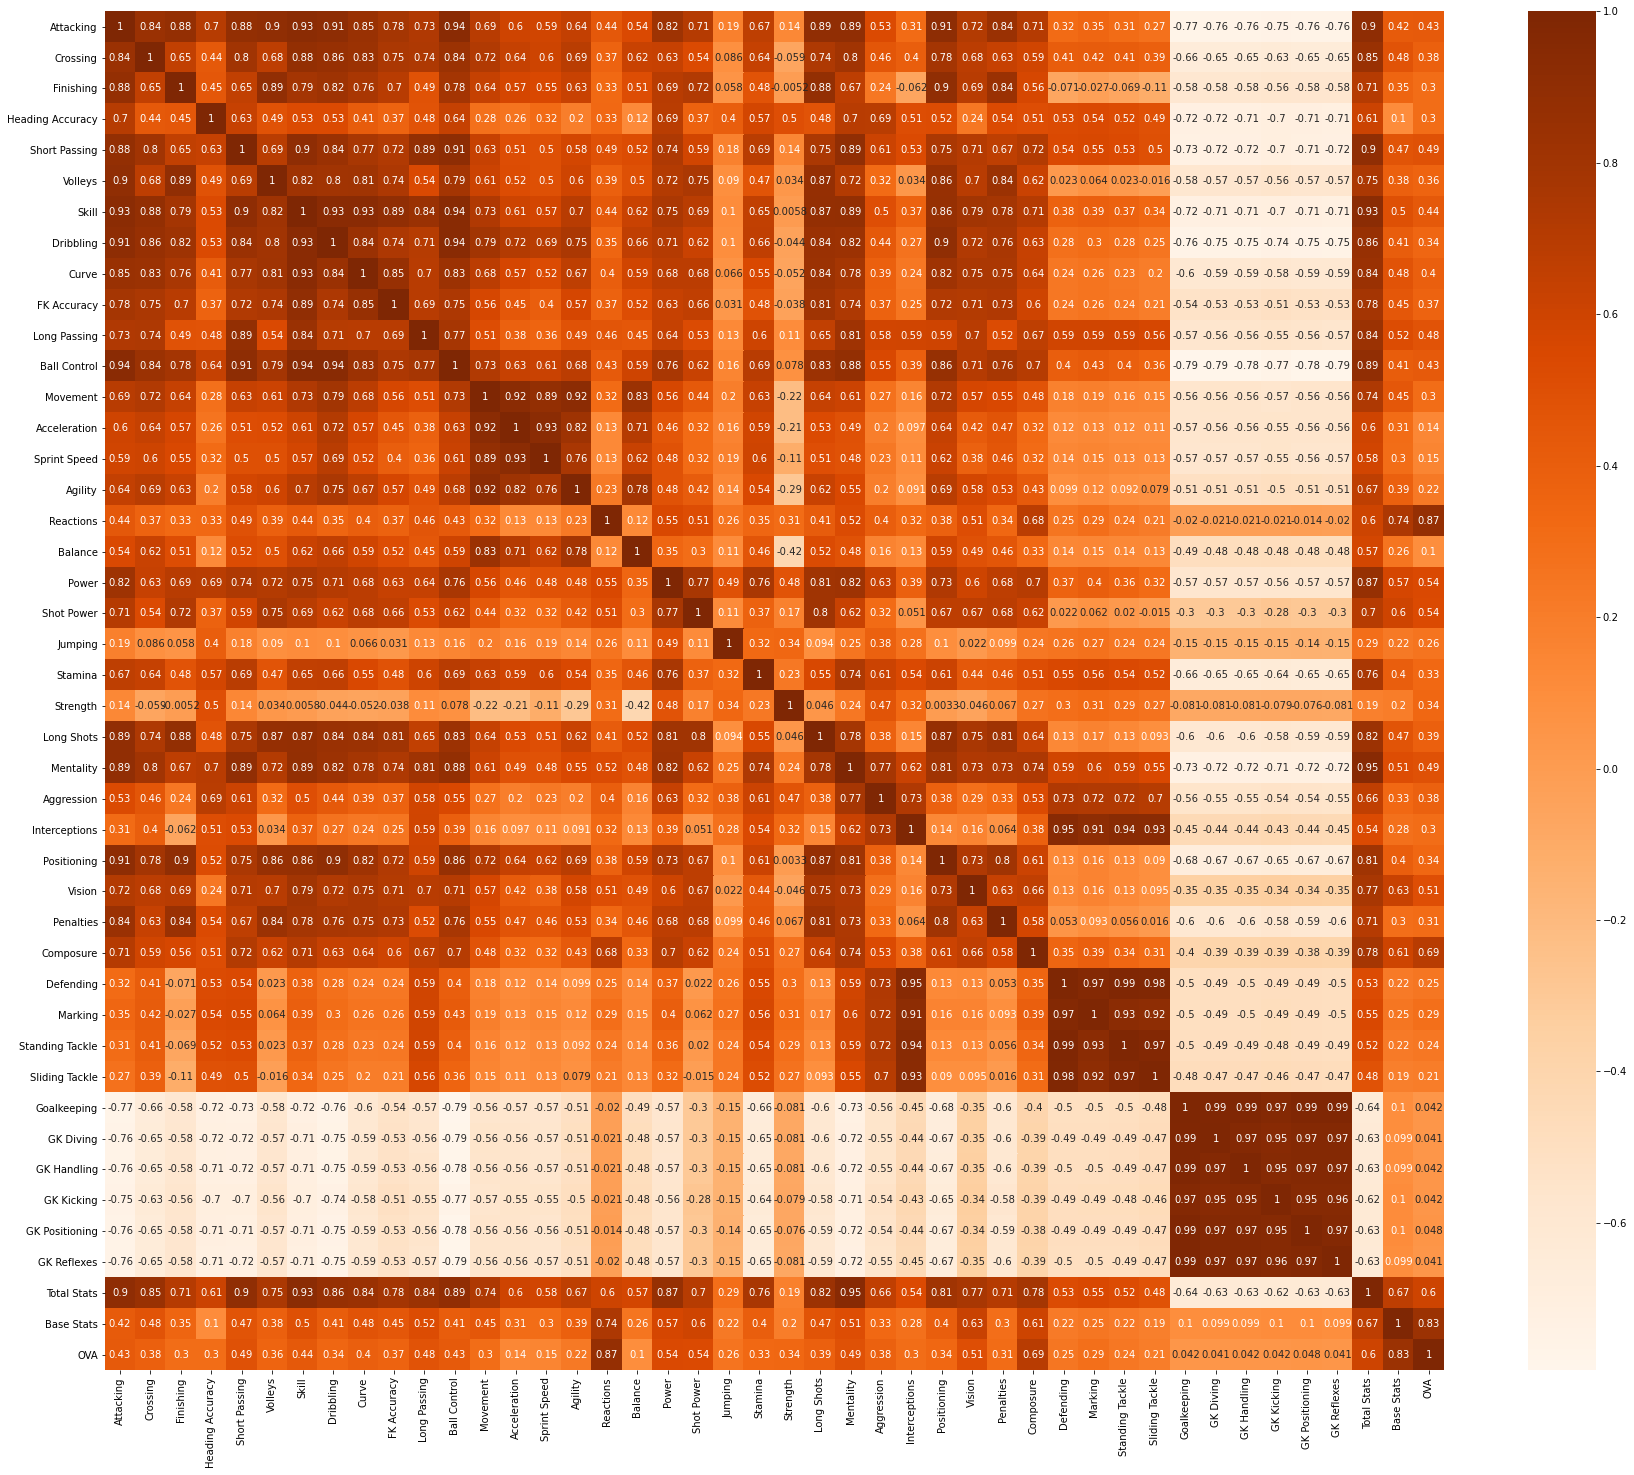

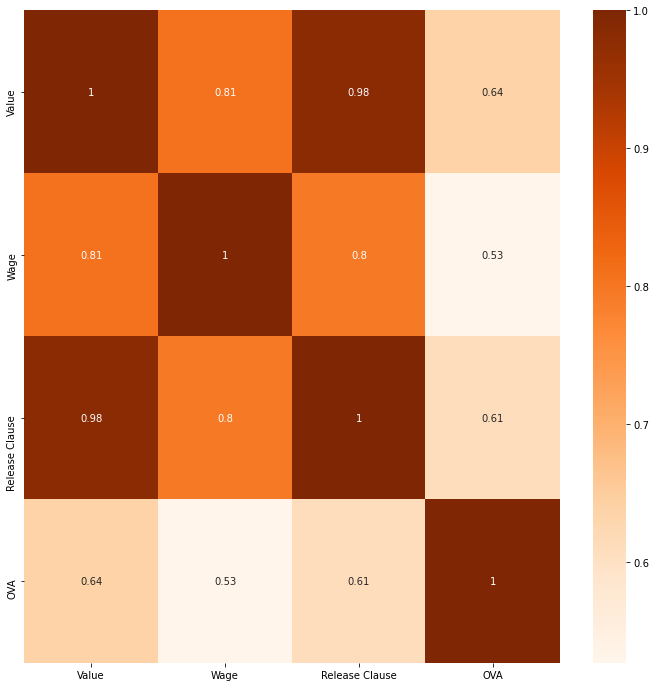

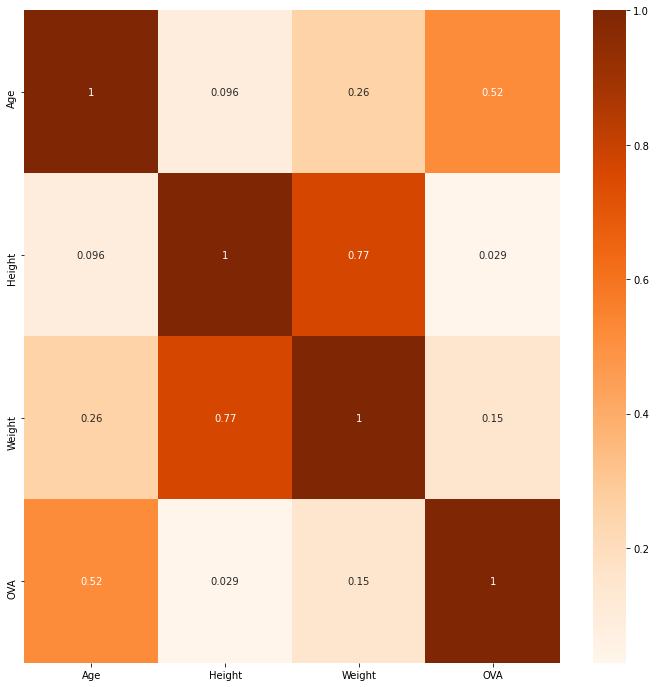

In [193]:
# Visualize the matrices
# Check for the collinearity between features in matrix
def heatmapper(dataframe, size = (20,20)):
    fig = plt.figure(figsize= size)
    correlation_matrix = dataframe.corr()
    heatmap = sns.heatmap(correlation_matrix, cmap = 'Oranges', annot=True)
    return heatmap

heatmapper(player_stats, (30,25))

player_value['Value'] = pd.to_numeric(player_value['Value'])
player_value['Wage'] = pd.to_numeric(player_value['Wage'])
player_value['Release Clause'] = pd.to_numeric(player_value['Release Clause'])

heatmapper(player_value, (12,12))
heatmapper(physical_traits, (12,12))
plt.show()

In [226]:
# Split data into Feature and target sets
X = fifa_players_clean.drop(['OVA','Position', 'Attacking', 'Skill', 'Movement','Power','Mentality','Defending','Goalkeeping', "Release Clause", 'Base Stats'], axis = 1)
y = fifa_players_clean['OVA']

In [227]:
#Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 100)

In [228]:
# normalize X_train values
X_train_numericals = X_train._get_numeric_data()
X_train_categoricals = X_train.select_dtypes('object')

# normalize X_test values
X_test_numericals = X_test._get_numeric_data()
X_test_categoricals = X_test.select_dtypes('object')

In [229]:
# standardize the data with StandardSCaler
StandardTransformer = StandardScaler().fit(X_train_numericals)
X_stand = pd.DataFrame(StandardTransformer.transform(X_train_numericals), columns = X_train_numericals.columns)
X_stand.head()

,Age,Height,Weight,Growth,Value,Wage,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,W/F,SM,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK
0,-1.473382,-1.956428,-1.105036,1.639283,-0.363928,-0.523618,0.746327,-1.134254,-0.322549,-0.602035,-0.625039,-0.212522,-0.586325,-0.480253,-1.493123,-0.603926,1.122585,0.727432,1.333051,-1.537256,1.221554,-1.843265,0.662293,1.347533,-1.500606,-1.056797,-0.930577,0.779026,-0.648619,-1.420689,-0.721252,-1.894163,0.295977,0.184840,0.762828,-0.628419,-0.279990,-0.282010,-0.156718,-0.337205,-0.451281,-1.457178,-0.576531,-0.328524,0.966236,-1.813027,-1.175016,-0.742219,0.291664,-0.901976,0.000109,-0.878624,-0.878624,-0.878624,-0.320340,-0.685538,-0.685538,-0.685538,-0.320340,-0.640192,-0.640192,-0.640192,-0.231349,-0.683095,-0.683095,-0.683095,-0.231349,0.518967,-0.124640,-0.124640,-0.124640,0.518967,0.568094,0.128275,0.128275,0.128275,0.568094,-0.463313
1,0.552661,0.976822,0.528722,-0.951301,1.910995,0.777709,0.913641,0.202632,1.025137,1.466210,0.279873,0.781885,1.669213,0.318955,1.728754,0.836206,-1.660949,-1.487420,-1.076168,1.437959,-1.260725,0.832841,0.412636,1.153013,2.018098,0.305761,1.231390,1.451386,0.552343,1.787362,0.612860,2.241739,1.584709,1.161163,1.234566,-0.569545,-0.587424,-0.655131,-0.096243,-0.105977,1.146345,1.508849,0.700712,4.139485,-2.237201,0.136565,1.674010,0.477794,1.479781,2.057190,0.000109,0.650783,0.650783,0.650783,0.530725,0.698418,0.698418,0.698418,0.530725,0.904849,0.904849,0.904849,0.802113,1.428670,1.428670,1.428670,0.802113,1.271651,1.723052,1.723052,1.723052,1.271651,1.231249,1.565145,1.565145,1.565145,1.231249,-0.259537
2,0.957870,0.243510,0.654396,-0.951301,-0.336185,-0.475421,-0.759501,-0.414392,0.732162,0.467747,-1.077495,0.063702,-0.256246,1.346509,0.587672,0.084833,-0.914148,-0.656850,-0.318985,0.225834,0.228642,0.684169,-0.918866,0.245256,0.376036,0.515385,1.874137,1.019154,-0.857482,0.329157,0.295214,0.518447,1.138609,1.068180,1.140218,-0.392923,-0.587424,-0.095450,-0.459094,-0.048170,0.360941,0.025835,-0.576531,-0.328524,-1.258373,-0.441092,-0.094351,-0.335548,1.182752,0.730667,0.000109,-0.113920,-0.113920,-0.113920,-0.249418,-0.102819,-0.102819,-0.102819,-0.249418,0.021968,0.021968,0.021968,-0.157530,0.411894,0.411894,0.411894,-0.157530,0.518967,0.983975,0.983975,0.983975,0.518967,0.715462,1.086188,1.086188,1.086188,0.715462,-0.327463
3,0.755265,1.343479,0.842907,-0.951301,-0.424037,-0.379026,-1.317215,-1.597022,1.435302,-0.316759,-1.247166,-1.262173,-1.081443,-1.108202,-0.486287,-1.104841,-1.864623,-1.348992,-1.007333,-0.876097,-1.615336,-1.248575,-2.583243,0.180416,1.705324,-1.214015,0.062759,0.538897,-0.648619,-1.639420,-0.594194,0.346118,0.593376,0.789230,0.998697,-0.510671,-0.402964,-0.157637,-0.519570,-0.048170,-1.110254,0.025835,-0.576531,-0.328524,-2.326186,-2.029648,-1.666227,-2.470569,0.766911,0.832708,0.000109,-0.955094,-0.955094,-0.955094,-1.384171,-1.268256,-1.268256,-1.268256,-1.384171,-1.228780,-1.228780,-1.228780,-1.264811,-0.761309,-0.761309,-0.761309,-1.264811,-0.158448,0.170991,0.170991,0.170991,-0.158448,0.125991,0.675654,0.675654,0.675654,0.125991,-0.395388
4,0.147453,-0.123147,-0.979362,-0.433184,-0.382423,-0.234434,-1.596072,-1.237091,0.614972,-0.673353,-1.360280,-1.317418,-1.576561,-1.336547,-0.821899,-0.541311,-0.846256,-1.002921,-0.938498,-0.104745,-0.125969,-2.140610,1.161606,0.050736,0.688810,-1.738075,0.705506,0.971129,-1.431855,-1.931061,-1.102428,-0.860187,0.841209,0.835722,0.621307,-0.392923,-0.402964,-0.282010,-0.217193,-0.163784,-1.025967,0.025835,-0.576531,-0.328524,-1.436342,-2.246269,-2.157438,-2.063899,0.

In [230]:
# Standardize the test data
X_stand_test = pd.DataFrame(StandardTransformer.transform(X_test_numericals), columns = X_train_numericals.columns)
X_stand_test.head()

,Age,Height,Weight,Growth,Value,Wage,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,W/F,SM,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK
0,-0.055152,1.343479,1.094254,-0.433184,0.005979,0.247539,-0.536415,-0.620067,1.025137,0.396428,0.788886,-0.267767,-0.256246,-0.765684,0.923285,-0.103011,-0.235237,0.104505,-0.181315,0.225834,-1.686259,0.535496,1.577700,0.180416,1.939904,-1.056797,1.172959,0.923103,-1.066345,-0.691587,-0.085961,0.863105,0.841209,1.254146,1.093045,-0.334049,-0.341477,0.028924,-0.519570,-0.221591,0.249836,-1.457178,-0.576531,-0.328524,-0.279545,-0.946542,-0.389078,-0.843886,1.123346,1.649029,0.000109,-0.113920,-0.113920,-0.113920,-0.391262,-0.394178,-0.394178,-0.394178,-0.391262,-0.345899,-0.345899,-0.345899,-0.231349,0.099040,0.099040,0.099040,-0.231349,0.594236,0.910068,0.910068,0.910068,0.594236,0.789146,1.223033,1.223033,1.223033,0.789146,-0.327463
1,-0.662965,-0.856459,-1.544894,0.257638,1.263659,0.681314,0.579013,1.076750,-0.498335,0.753022,0.902000,1.223843,1.064069,0.832732,0.520550,1.086663,1.733604,1.419573,1.746060,0.776800,1.079709,0.907178,-0.336334,1.088174,-0.093124,1.249070,-0.989009,-0.133462,0.865638,1.276990,0.485802,1.207764,-0.397956,0.091857,-0.274994,-0.275175,-0.157017,-0.033263,-0.096243,-0.048170,1.046733,0.025835,1.977955,-0.328524,1.767095,1.003050,0.888072,1.596138,-0.361801,-0.187694,0.000109,1.033135,1.033135,1.033135,1.239946,1.208297,1.208297,1.208297,1.239946,1.272716,1.272716,1.272716,1.171207,1.037602,1.037602,1.037602,1.171207,0.594236,0.318806,0.318806,0.318806,0.594236,0.420726,-0.145415,-0.145415,-0.145415,0.420726,-0.055762
2,1.363078,-0.856459,-1.105036,-0.951301,4.130432,1.597062,1.582898,2.105123,1.376707,1.323572,2.146254,1.610557,1.614200,2.031544,0.923285,1.587578,0.851020,1.419573,1.746060,2.319505,0.512331,1.427532,0.079761,0.374935,-0.405898,1.668318,0.354917,-0.373591,1.648874,1.714452,2.010502,2.155575,-0.397956,-1.256399,-1.312817,-0.216301,0.027443,-0.406384,-0.217193,-0.163784,1.644406,1.508849,0.700712,1.905481,1.233189,2.158363,1.870494,2.206144,-0.896453,-0.187694,0.000109,1.950780,1.950780,1.950780,1.878244,1.936695,1.936695,1.936695,1.878244,1.861303,1.861303,1.861303,1.761757,1.428670,1.428670,1.428670,1.761757,0.443699,0.244899,0.244899,0.244899,0.443699,0.199674,-0.282260,-0.282260,-0.282260,0.199674,0.012164
3,1.160474,-0.856459,-0.853688,-0.951301,0.005979,-0.234434,0.634784,0.768238,-0.088169,0.895660,0.619215,0.892374,1.119082,0.832732,1.124652,0.898820,-0.099455,-0.241566,0.369363,1.107380,0.866943,1.353196,0.662293,1.217853,0.610616,0.882227,0.763938,1.019154,0.813422,1.349901,0.422273,1.293928,-0.050990,0.882213,0.810002,0.019195,-0.525937,-0.157637,-0.580045,-0.048170,1.199983,1.508849,0.700712,-0.328524,-0.457514,0.786428,1.084556,0.986132,0.529288,1.036788,0.000109,0.880194,0.880194,0.880194,0.814413,0.916938,0.916938,0.916938,0.814413,0.978422,0.978422,0.978422,0.949751,1.194029,1.194029,1.194029,0.949751,0.970578,1.057883,1.057883,1.057883,0.970578,0.862830,0.744076,0.744076,0.744076,0.862830,-0.191612
4,-1.270778,1.343479,1.219928,1.293871,-0.336185,-0.330829,0.244385,0.202632,0.263401,0.396428,0.279873,0.781885,0.073833,0.376042,0.453428,0.397905,-0.235237,0.035291,-0.387820,-0.325132,-0.622425,0.461160,-0.669209,0.180416,0.610616,-0.008676,0.238054,-0.469642,0.552343,0.620798,0.485802,-0.170870,-0.348389,-0.373059,-0.227821,-0.216301,-0.464450,-0.282010,-0.338144,-0.337205,0.085092,0.025835,-0.576531,-0.328524,-0.368530,-0.007850,0.200376,0.376126,-0.540018,0.322507,0.000109,0.421372,0.421372,0.421372,0.388881,0.407059,0.407

In [231]:
# normalize the data with MinMaxSCaler
MinMaxTransformer = MinMaxScaler().fit(X_train_numericals)
X_norms = pd.DataFrame(MinMaxTransformer.transform(X_train_numericals), columns = X_train_numericals.columns)



In [232]:
# normalize the test data
X_norms_test = pd.DataFrame(MinMaxTransformer.transform(X_test_numericals), columns = X_test_numericals.columns)

X_norms_test.shape


(3425, 78)

In [233]:
# Create encoder to convert categorical values to numerical
X_encoder = OneHotEncoder().fit(X_train_categoricals)

# encode training data as array
X_train_encoded = X_encoder.transform(X_train_categoricals).toarray()

new_headers = (['Right Foot', 'Left Foot'],['A/W High', 'A/W Low', 'A/W Medium', 'A/W nan'],['D/W High', 'D/W Low', 'D/W Medium', 'X'])

category_columns = []
for columns in new_headers:
    for column_header in columns:
        category_columns.append(column_header)
X_train_encoded = pd.DataFrame(X_train_encoded, columns = category_columns)
X_train_encoded.drop(['A/W nan', 'X'], axis = 1, inplace= True)

In [234]:
# Prepare Testing data
X_test_encoded = X_encoder.transform(X_test_categoricals).toarray()

new_headers = (['Right Foot', 'Left Foot'],['A/W High', 'A/W Low', 'A/W Medium', 'A/W nan'],['D/W High', 'D/W Low', 'D/W Medium', 'X'])

category_columns = []
for columns in new_headers:
    for column_header in columns:
        category_columns.append(column_header)

X_test_encoded = pd.DataFrame(X_test_encoded, columns = category_columns)
X_test_encoded.drop(['A/W nan', 'X'], axis = 1, inplace = True)
X_test_encoded.head()


,Right Foot,Left Foot,A/W High,A/W Low,A/W Medium,D/W High,D/W Low,D/W Medium
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [235]:
# Merge X training data in two sets for training
X_train_norm = pd.concat([X_norms,X_train_encoded], axis = 1)
X_train_stand = pd.concat([X_stand ,X_train_encoded], axis = 1) 
X_train_norm.shape

(10275, 86)

In [236]:
# Merge X testing data in two sets for testing
X_test_norm = pd.concat([X_norms_test, X_test_encoded], axis = 1)
X_test_stand = pd.concat([X_stand_test, X_test_encoded], axis = 1) 

X_test_norm.head()

,Age,Height,Weight,Growth,Value,Wage,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,W/F,SM,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Right Foot,Left Foot,A/W High,A/W Low,A/W Medium,D/W High,D/W Low,D/W Medium
0,0.290323,0.7,0.523810,0.148148,0.031023,0.030411,0.409091,0.358696,0.750000,0.674419,0.639535,0.527473,0.455556,0.292135,0.698795,0.593407,0.588235,0.650602,0.592593,0.577465,0.276316,0.662651,0.849315,0.639535,0.909091,0.277778,0.779070,0.681319,0.319149,0.423529,0.482759,0.686747,0.685393,0.821429,0.746988,0.090909,0.088889,0.163043,0.056180,0.123596,0.613477,0.25,0.25,0.00,0.557143,0.328947,0.441176,0.417910,0.736842,0.843750,0.194528,0.526316,0.526316,0.526316,0.487179,0.474359,0.474359,0.474359,0.487179,0.487179,0.487179,0.487179,0.526316,0.581081,0.581081,0.581081,0.526316,0.680556,0.728571,0.728571,0.728571,0.680556,0.739130,0.774648,0.774648,0.774648,0.739130,0.0875,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.193548,0.4,0.190476,0.296296,0.109185,0.046512,0.636364,0.717391,0.454545,0.732558,0.662791,0.824176,0.722222,0.606742,0.626506,0.802198,0.929412,0.879518,0.938272,0.647887,0.789474,0.722892,0.534247,0.802326,0.571429,0.766667,0.348837,0.439560,0.712766,0.741176,0.586207,0.734940,0.404494,0.523810,0.397590,0.102273,0.122222,0.152174,0.134831,0.157303,0.745709,0.50,0.75,0.00,0.885714,0.684211,0.632353,0.776119,0.407895,0.562500,0.194528,0.723684,0.723684,0.723684,0.782051,0.756410,0.756410,0.756410,0.782051,0.769231,0.769231,0.769231,0.776316,0.743243,0.743243,0.743243,0.776316,0.680556,0.614286,0.614286,0.614286,0.680556,0.666667,0.492958,0.492958,0.492958,0.666667,0.1375,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.516129,0.4,0.246032,0.037037,0.287348,0.080501,0.840909,0.934783,0.818182,0.825581,0.918605,0.901099,0.833333,0.842697,0.698795,0.890110,0.776471,0.879518,0.938272,0.845070,0.684211,0.807229,0.602740,0.674419,0.519481,0.855556,0.616279,0.384615,0.872340,0.811765,0.862069,0.867470,0.404494,0.178571,0.132530,0.113636,0.155556,0.086957,0.112360,0.134831,0.844882,0.75,0.50,0.25,0.800000,0.894737,0.779412,0.865672,0.289474,0.562500,0.194528,0.881579,0.881579,0.881579,0.897436,0.884615,0.884615,0.884615,0.897436,0.871795,0.871795,0.871795,0.881579,0.810811,0.810811,0.810811,0.881579,0.652778,0.600000,0.600000,0.600000,0.652778,0.623188,0.464789,0.464789,0.464789,0.623188,0.1500,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.483871,0.4,0.277778,0.037037,0.031023,0.012522,0.647727,0.652174,0.534091,0.755814,0.604651,0.758242,0.733333,0.606742,0.734940,0.769231,0.611765,0.590361,0.691358,0.690141,0.750000,0.795181,0.698630,0.825581,0.688312,0.688889,0.697674,0.703297,0.702128,0.752941,0.574713,0.746988,0.483146,0.726190,0.674699,0.159091,0.055556,0.130435,0.044944,0.157303,0.771138,0.75,0.50,0.00,0.528571,0.644737,0.661765,0.686567,0.605263,0.750000,0.194528,0.697368,0.697368,0.697368,0.705128,0.705128,0.705128,0.705128,0.705128,0.717949,0.717949,0.717949,0.736842,0.770270,0.770270,0.770270,0.736842,0.750000,0.757143,0.757143,0.757143,0.750000,0.753623,0.676056,0.676056,0.676056,0.753623,0.1125,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.096774,0.7,0.539683,0.518519,0.009759,0.008945,0.568182,0.532609,0.602273,0.674419,0.534884,0.736264,0.522222,0.516854,0.614458,0.681319,0.588235,0.638554,0.555556,0.507042,0.473684,0.650602,0.479452,0.639535,0.688312,0.500000,0.593023,0.362637,0.648936,0.635294,0.586207,0.542169,0.415730,0.404762,0.409639,0.113636,0.066667,0.108696,0.089888,0.101124,0.586141,0.50,0.25,0.00,0.542857,0.500000,0.529412,0.597015,0.368421,0.640625,0.194528,0.618421,0.618421,0.618421,0.628205,0.615385,0.615385,0.

In [237]:
# train Model 1 on normalized numerical data

Model1 = LinearRegression().fit(X_train_norm, y_train)

training_predictions = Model1.predict(X_train_norm)

#Evaluate Model1 training performance
r2 = r2_score(y_train, training_predictions)
mse = round(mean_squared_error(y_train, training_predictions), 2)
rmse = round(sqrt(mean_squared_error(y_train, training_predictions)), 2)
mae = round(mean_absolute_error(y_train, training_predictions), 2)



In [238]:
# test Model 1 on normalized numerical data
test_predictions = Model1.predict(X_test_norm)

#Evaluate Model1 training performance
r2_test = r2_score(y_test, test_predictions)
mse_test = round(mean_squared_error(y_test, test_predictions), 2)
rmse_test = round(sqrt(mean_squared_error(y_test, test_predictions)), 2)
mae_test = round(mean_absolute_error(y_test, test_predictions), 2)

In [239]:
print(f'Results of Model 1 Performance:\nTraining Performance\nR2 Score:  {r2}\nMean Squared Error:  {mse}\nRoot Mean Squared Error:  {rmse}\nMean Absolute Error: {rmse}\n')
print(f'Results of Model 1 Performance:\nTesting Performance\nR2 Score:  {r2_test}\nMean Squared Error:  {mse_test}\nRoot Mean Squared Error:  {rmse}\nMean Absolute Error:  {mae_test}\n')

Results of Model 1 Performance:
Training Performance
R2 Score:  0.9101141599327423
Mean Squared Error:  4.25
Root Mean Squared Error:  2.06
Mean Absolute Error: 2.06

Results of Model 1 Performance:
Testing Performance
R2 Score:  0.9114155500890059
Mean Squared Error:  4.1
Root Mean Squared Error:  2.06
Mean Absolute Error:  1.57



In [240]:
# train Model 2 on normalized numerical data

Model2 = LinearRegression().fit(X_train_stand, y_train)

training_predictions = Model2.predict(X_train_stand)

#Evaluate Model1 training performance
r2_2 = r2_score(y_train, training_predictions)
mse_2 = round(mean_squared_error(y_train, training_predictions), 2)
rmse_2 = round(sqrt(mean_squared_error(y_train, training_predictions)), 2)
mae_2 = round(mean_absolute_error(y_train, training_predictions), 2)

In [241]:
# test Model 2 on normalized numerical data
test_predictions = Model2.predict(X_test_stand)

#Evaluate Model1 training performance
r2_test2 = r2_score(y_test, test_predictions)
mse_test2 = round(mean_squared_error(y_test, test_predictions), 2)
rmse_test2 = round(sqrt(mean_squared_error(y_test, test_predictions)), 2)
mae_test2 = round(mean_absolute_error(y_test, test_predictions), 2)

In [242]:
print(f'Results of Model 2 Performance:\nTraining Performance\nR2 Score:  {r2_2}\nMean Squared Error:  {mse_2}\nRoot Mean Squared Error:  {rmse_2}\nMean Absolute Error: {rmse_2}\n')
print(f'Results of Model 2 Performance:\nTesting Performance\nR2 Score:  {r2_test2}\nMean Squared Error:  {mse_test2}\nRoot Mean Squared Error:  {rmse_test2}\nMean Absolute Error:  {mae_test2}\n')

Results of Model 2 Performance:
Training Performance
R2 Score:  0.9101140024403049
Mean Squared Error:  4.25
Root Mean Squared Error:  2.06
Mean Absolute Error: 2.06

Results of Model 2 Performance:
Testing Performance
R2 Score:  0.9114142774997199
Mean Squared Error:  4.1
Root Mean Squared Error:  2.03
Mean Absolute Error:  1.57

